In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import string
from nltk.corpus import stopwords
from sklearn.neighbors import NearestNeighbors
import re

%matplotlib inline

In [2]:
df = pd.read_csv('data/Advanced_Search_Hopper.csv')
df.head()

Category  Keyword                             Web_Page_URL  \
0  Post&Comment      NaN  https://twitter.com/hopper/with_replies   
1  Post&Comment      NaN  https://twitter.com/hopper/with_replies   
2  Post&Comment      NaN  https://twitter.com/hopper/with_replies   
3  Post&Comment      NaN  https://twitter.com/hopper/with_replies   
4  Post&Comment      NaN  https://twitter.com/hopper/with_replies   

                                       Tweet_Website     Author_Name  \
0  https://twitter.com/HopperSupport/status/14683...  @HopperSupport   
1  https://twitter.com/HopperSupport/status/14683...  @HopperSupport   
2  https://twitter.com/hopper/status/146723941476...         @hopper   
3  https://twitter.com/hopper/status/146723559180...         @hopper   
4  https://twitter.com/hopper/status/146723559180...         @hopper   

                 Author_Web_Page_URL  Tweet_Timestamp  \
0  https://twitter.com/HopperSupport    1638927160000   
1  https://twitter.com/HopperSupport    1638911032000   
2         https://twitter.com/hopper    1638652111000   
3         https://twitter.com/hopper    1638651199000   
4         https://twitter.com/hopper    1638651199000   

                                       Tweet_Content Tweet_Image_URL  \
0  We have now resolved the technical issues whic...             NaN   
1  We apologize for any delays getting back to yo...             NaN   
2  Thank you for the feedback. We want to assist ...             NaN   
3  Hi there, we apologize for the inconvenience a...             NaN   
4  Hi there, we apologize for the inconvenience a...             NaN   

   Tweet_Video_URL  ...  Comment_Name              Comment_Author__URL  \
0              NaN  ...     undefined                        undefined   
1              NaN  ...     undefined                        undefined   
2              NaN  ...     undefined                        undefined   
3              NaN  ...       @hopper       https://twitter.com/hopper   
4              NaN  ...  @mel62697397  https://twitter.com/mel62697397   

   Comment_Timestamp                                    Comment_Content  \
0          undefined                                          undefined   
1          undefined                                          undefined   
2          undefined                                          undefined   
3                NaN  Hi there, we apologize for the inconvenience a...   
4      1638651187000   are frauds and dishonest about changing fligh...   

  Comment_Image_URL Comment_Video_URL Comment_Number_of_Likes  \
0         undefined         undefined               undefined   
1         undefined         undefined               undefined   
2         undefined         undefined               undefined   
3               NaN               NaN                     NaN   
4               NaN               NaN                       3   

  Comment_Number_of_Retweets Comment_Number_of_Reviews Comment_Number_of_share  
0                  undefined                 undefined               undefined  
1                  undefined                 undefined               undefined  
2                  undefined                 undefined               undefined  
3                        NaN                       NaN                     NaN  
4                        NaN                         1                     NaN  

[5 rows x 25 columns]

In [3]:
# get rid of undefined / no comments
df = df.loc[(df['Comment_Content']!= 'undefined')]

In [4]:
# create corpus df with just comment_content 

corpus = df[['Comment_Content']]

In [5]:
corpus['Comment_Content']

3       Hi there, we apologize for the inconvenience a...
4        are frauds and dishonest about changing fligh...
5       I agree with you Mel. I reached out to their s...
6        this is a total scam and fraud. I can't belie...
7        is not helping...maybe the FAA or my Congress...
                              ...                        
1758    Reminding myself to start this thread on my qu...
1760    La app Hopper es super buena para los que busc...
1761                                   Ya la voy a buscar
1768                                       Unable to join
1769    We need #Boston beta testers! Join us at the H...
Name: Comment_Content, Length: 1079, dtype: object

In [6]:
import texthero as hero
from texthero import preprocessing
custom_pipeline = [preprocessing.fillna,
                   #preprocessing.lowercase,
                   preprocessing.remove_whitespace,
                   preprocessing.remove_diacritics
                   #preprocessing.remove_brackets
                  ]

df['clean_text'] = hero.clean(df['Comment_Content'], custom_pipeline)
df['clean_text'] = [n.replace('{','') for n in df['clean_text']]
df['clean_text'] = [n.replace('}','') for n in df['clean_text']]
df['clean_text'] = [n.replace('(','') for n in df['clean_text']]
df['clean_text'] = [n.replace(')','') for n in df['clean_text']]

### Generating Vectors Using TF-IDF

In [7]:
df['tfidf'] = (hero.tfidf(df['clean_text'], max_features = 3000))

In [8]:
df.head(1)

Category  Keyword                             Web_Page_URL  \
3  Post&Comment      NaN  https://twitter.com/hopper/with_replies   

                                       Tweet_Website Author_Name  \
3  https://twitter.com/hopper/status/146723559180...     @hopper   

          Author_Web_Page_URL  Tweet_Timestamp  \
3  https://twitter.com/hopper    1638651199000   

                                       Tweet_Content Tweet_Image_URL  \
3  Hi there, we apologize for the inconvenience a...             NaN   

   Tweet_Video_URL  ...  Comment_Timestamp  \
3              NaN  ...                NaN   

                                     Comment_Content  Comment_Image_URL  \
3  Hi there, we apologize for the inconvenience a...                NaN   

   Comment_Video_URL Comment_Number_of_Likes Comment_Number_of_Retweets  \
3                NaN                     NaN                        NaN   

  Comment_Number_of_Reviews Comment_Number_of_share  \
3                       NaN                     NaN   

                                          clean_text  \
3  Hi there, we apologize for the inconvenience a...   

                                               tfidf  
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  

[1 rows x 27 columns]

In [9]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
#tokenize and tag the card text
card_docs = [TaggedDocument(doc.split(' '), [i]) 
             for i, doc in enumerate(df.clean_text)]
#display the tagged docs
card_docs

[TaggedDocument(words=['Hi', 'there,', 'we', 'apologize', 'for', 'the', 'inconvenience', 'and', 'can', 'recognize', 'your', 'frustration', 'with', 'the', 'issues', 'you', 'encountered.', 'We', 'are', 'here', 'to', 'make', 'things', 'right.', 'Please', 'DM', 'us', 'with', 'your', 'email', 'address', 'linked', 'to', 'your', 'Hopper', 'account.', 'We', 'look', 'forward', 'to', 'hearing', 'from', 'you', 'soon.'], tags=[0]),
 TaggedDocument(words=['are', 'frauds', 'and', 'dishonest', 'about', 'changing', 'flights', 'and', 'fees'], tags=[1]),
 TaggedDocument(words=['I', 'agree', 'with', 'you', 'Mel.', 'I', 'reached', 'out', 'to', 'their', 'support', 'staff', 'and', 'after', '2', 'hours,', "I'm", 'still', 'waiting', 'to', 'hear', 'back', 'about', 'a', 'flight', 'change.', "It's", '2:32am.', 'When', 'I', 'return', 'home,', "I'm", 'deleting', 'my', 'Hopper', 'App', '&', 'book', 'on', 'the', "airlines'", 'websites', 'because', 'at', 'least', 'they', 'respond', 'to', 'you.'], tags=[2]),
 TaggedDo

In [10]:
# Instantiate the Doc2Vec model
model = Doc2Vec(vector_size=64, min_count=1, epochs=20)

In [11]:
#instantiate model
model = Doc2Vec(vector_size=64, window=2, min_count=1, workers=8, epochs = 40)
#build vocab
model.build_vocab(card_docs)
#train model
model.train(card_docs, total_examples=model.corpus_count
            ,epochs=model.epochs)

In [12]:
#generate vectors
card2vec = [model.infer_vector((df.clean_text.tolist()[i].split(' '))) 
            for i in range(0,len(df.clean_text.tolist()))]
card2vec

[array([-0.5267729 ,  0.30106312,  0.68460953, -0.41751197, -0.00447753,
        -0.2734046 , -0.42115536,  0.53393155,  0.11425011, -0.67947596,
        -0.1957571 , -0.4450997 ,  0.12741677,  0.06845148, -0.05218448,
        -0.3547674 ,  0.02371771,  0.32027295,  0.69358957, -0.86623144,
        -0.08029436,  0.21096304, -0.11257425,  0.21759397, -0.5203585 ,
         0.4230893 ,  0.5037603 ,  0.4077697 ,  0.4679621 ,  0.2240296 ,
        -0.37413946,  0.36846122, -0.31430897, -0.23733096, -0.07177664,
        -0.16196427,  0.11564366, -0.15927313,  0.8238744 , -0.03788293,
        -0.2828417 ,  0.7202684 , -0.38677964, -0.72005445,  0.30059293,
        -0.3322883 ,  0.71600944, -0.4932722 , -0.28164417, -0.19182166,
        -0.23212212, -0.28537813,  0.6562487 , -0.3722342 ,  0.944026  ,
         0.17366445,  0.43850106, -0.22670995, -0.35279903,  0.55660915,
        -0.17684221,  0.8268228 , -0.07187232,  0.2581377 ], dtype=float32),
 array([-0.3866024 ,  0.3765031 ,  0.20274423, 

## Classify Words

In [13]:
import numpy as np
#Create a list of lists
dtv= np.array(card2vec).tolist()
#set list to dataframe column
df['card2vec'] = dtv
df.head(2)


Category  Keyword                             Web_Page_URL  \
3  Post&Comment      NaN  https://twitter.com/hopper/with_replies   
4  Post&Comment      NaN  https://twitter.com/hopper/with_replies   

                                       Tweet_Website Author_Name  \
3  https://twitter.com/hopper/status/146723559180...     @hopper   
4  https://twitter.com/hopper/status/146723559180...     @hopper   

          Author_Web_Page_URL  Tweet_Timestamp  \
3  https://twitter.com/hopper    1638651199000   
4  https://twitter.com/hopper    1638651199000   

                                       Tweet_Content Tweet_Image_URL  \
3  Hi there, we apologize for the inconvenience a...             NaN   
4  Hi there, we apologize for the inconvenience a...             NaN   

   Tweet_Video_URL  ...                                    Comment_Content  \
3              NaN  ...  Hi there, we apologize for the inconvenience a...   
4              NaN  ...   are frauds and dishonest about changing fligh...   

   Comment_Image_URL  Comment_Video_URL  Comment_Number_of_Likes  \
3                NaN                NaN                      NaN   
4                NaN                NaN                        3   

  Comment_Number_of_Retweets Comment_Number_of_Reviews  \
3                        NaN                       NaN   
4                        NaN                         1   

  Comment_Number_of_share                                         clean_text  \
3                     NaN  Hi there, we apologize for the inconvenience a...   
4                     NaN  are frauds and dishonest about changing flight...   

                                               tfidf  \
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                            card2vec  
3  [-0.5267729163169861, 0.3010631203651428, 0.68...  
4  [-0.38660240173339844, 0.3765031099319458, 0.2...  

[2 rows x 28 columns]

## Generating Vectors using the Universal Sentence Encoder

In [14]:
import tensorflow_hub as hub
#download the model
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/5")

In [15]:
#generate embeddings
embeddings = embed(df['clean_text'])
#create list from np arrays
use= np.array(embeddings).tolist()
#add lists as dataframe column
df['use'] = use
#check dataframe
df.head(2)

Category  Keyword                             Web_Page_URL  \
3  Post&Comment      NaN  https://twitter.com/hopper/with_replies   
4  Post&Comment      NaN  https://twitter.com/hopper/with_replies   

                                       Tweet_Website Author_Name  \
3  https://twitter.com/hopper/status/146723559180...     @hopper   
4  https://twitter.com/hopper/status/146723559180...     @hopper   

          Author_Web_Page_URL  Tweet_Timestamp  \
3  https://twitter.com/hopper    1638651199000   
4  https://twitter.com/hopper    1638651199000   

                                       Tweet_Content Tweet_Image_URL  \
3  Hi there, we apologize for the inconvenience a...             NaN   
4  Hi there, we apologize for the inconvenience a...             NaN   

   Tweet_Video_URL  ...  Comment_Image_URL  Comment_Video_URL  \
3              NaN  ...                NaN                NaN   
4              NaN  ...                NaN                NaN   

   Comment_Number_of_Likes  Comment_Number_of_Retweets  \
3                      NaN                         NaN   
4                        3                         NaN   

  Comment_Number_of_Reviews Comment_Number_of_share  \
3                       NaN                     NaN   
4                         1                     NaN   

                                          clean_text  \
3  Hi there, we apologize for the inconvenience a...   
4  are frauds and dishonest about changing flight...   

                                               tfidf  \
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                            card2vec  \
3  [-0.5267729163169861, 0.3010631203651428, 0.68...   
4  [-0.38660240173339844, 0.3765031099319458, 0.2...   

                                                 use  
3  [0.040574654936790466, -0.00643624272197485, 0...  
4  [0.021798783913254738, 0.043314218521118164, 0...  

[2 rows x 29 columns]

In [16]:
df['tsnetfidf'] = hero.tsne(df['tfidf'])
df['tsnec2v'] = hero.tsne(df['card2vec'])
df['tsneuse'] = hero.tsne(df['use'])

In [17]:
#create scatter plot of tfidf
hero.scatterplot(df, col='tsnetfidf', color='Tweet_Timestamp', 
                 title="TF-IDF", hover_data = ['Comment_Name','Comment_Content'])

In [18]:
#create scatter plot of doc2vec
hero.scatterplot(df, col='tsnec2v', color='Tweet_Timestamp', 
                 title="Doc2Vec", hover_data = ['Comment_Name','Comment_Content'])

In [19]:
#create scatter plot of doc2vec
hero.scatterplot(df, col='tsneuse', color='Tweet_Timestamp', 
                 title="U.S.E", hover_data = ['Comment_Name','Comment_Content'])

In [21]:
df['use_total'] = df['use'].apply(sum).astype(int)

In [22]:
df['use_total'].value_counts()

 0    869
 1    165
-1     42
 2      2
-2      1
Name: use_total, dtype: int64

In [23]:
X = df['clean_text']
y = df['use_total']
from sklearn.feature_extraction.text import CountVectorizer

# 1. instantiate
bagofwords = CountVectorizer()

# 2. Fit
bagofwords.fit(df['clean_text'])

small_transformed = bagofwords.transform(df['clean_text'])
small_transformed

<1079x2519 sparse matrix of type '<class 'numpy.int64'>'
	with 20220 stored elements in Compressed Sparse Row format>

In [24]:
bagofwords.get_feature_names()

['000',
 '01',
 '06',
 '09',
 '10',
 '100',
 '100m',
 '100usd',
 '103',
 '109',
 '11',
 '12',
 '120',
 '12th',
 '1340',
 '1400',
 '1500',
 '15th',
 '16',
 '1600',
 '17',
 '1700',
 '175',
 '18',
 '183m',
 '185',
 '19',
 '1er',
 '1st',
 '1time',
 '20',
 '200',
 '2000',
 '2017',
 '2018',
 '2019',
 '2020',
 '204',
 '20min',
 '20th',
 '217',
 '22',
 '2300',
 '24',
 '24hrs',
 '25',
 '2500',
 '27',
 '28',
 '28ish',
 '29',
 '2ish',
 '2months',
 '2nd',
 '30',
 '300',
 '30mins',
 '31',
 '31st',
 '32am',
 '350',
 '35kg',
 '377',
 '39',
 '3k',
 '3rd',
 '3x',
 '40',
 '400',
 '4339',
 '450',
 '45am',
 '46',
 '476',
 '48',
 '48hrs',
 '491',
 '4x',
 '50',
 '500',
 '5h',
 '5hrs',
 '600',
 '62',
 '63',
 '65',
 '6574',
 '6th',
 '700',
 '7000',
 '72',
 '77',
 '80',
 '866',
 '887',
 '8k',
 '90',
 '949',
 'aa',
 'ab',
 'abilities',
 'able',
 'about',
 'abroad',
 'absolute',
 'absolutely',
 'abysmal',
 'acc',
 'accepting',
 'access',
 'accommodations',
 'according',
 'account',
 'accounts',
 'acct',
 'accura

In [25]:
# converting the sparse matrix into a numpy array
small_transformed.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [26]:
my_df = pd.DataFrame(columns=bagofwords.get_feature_names(), data=small_transformed.toarray())
display(my_df)

000  01  06  09  10  100  100m  100usd  103  109  ...  yikes  yo  york  \
0       0   0   0   0   0    0     0       0    0    0  ...      0   0     0   
1       0   0   0   0   0    0     0       0    0    0  ...      0   0     0   
2       0   0   0   0   0    0     0       0    0    0  ...      0   0     0   
3       0   0   0   0   0    0     0       0    0    0  ...      0   0     0   
4       0   0   0   0   0    0     0       0    0    0  ...      0   0     0   
...   ...  ..  ..  ..  ..  ...   ...     ...  ...  ...  ...    ...  ..   ...   
1074    0   0   0   0   0    0     0       0    0    0  ...      0   0     0   
1075    0   0   0   0   0    0     0       0    0    0  ...      0   0     0   
1076    0   0   0   0   0    0     0       0    0    0  ...      0   0     0   
1077    0   0   0   0   0    0     0       0    0    0  ...      0   0     0   
1078    0   0   0   0   0    0     0       0    0    0  ...      0   0     0   

      you  youll  your  yours  yr  zero  zoie  
0       2      0     3      0   0     0     0  
1       0      0     0      0   0     0     0  
2       2      0     0      0   0     0     0  
3       0      0     0      0   0     0     0  
4       0      0     0      0   0     0     0  
...   ...    ...   ...    ...  ..   ...   ...  
1074    0      0     0      0   0     0     0  
1075    0      0     0      0   0     0     0  
1076    0      0     0      0   0     0     0  
1077    0      0     0      0   0     0     0  
1078    0      0     0      0   0     0     0  

[1079 rows x 2519 columns]

In [27]:
# splitting our data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
# size of training data
X_train.shape

(722,)

In [29]:
# 1. Instantiate
bagofwords = CountVectorizer()

# 2. Fit
bagofwords.fit(X_train)

# 3. Transform
X_train_transformed = bagofwords.transform(X_train)
X_train_transformed

<722x2046 sparse matrix of type '<class 'numpy.int64'>'
	with 13499 stored elements in Compressed Sparse Row format>

In [30]:
X_test_transformed = bagofwords.transform(X_test)
X_test_transformed

<357x2046 sparse matrix of type '<class 'numpy.int64'>'
	with 6170 stored elements in Compressed Sparse Row format>

In [31]:
words = bagofwords.get_feature_names()
some_indices = range(1, 2051, round(2051/10)) # just pick some indices

samples = [words[i] for i in some_indices]
print(samples)

['09', 'assistance', 'coach', 'eliminates', 'gosh', 'june', 'nashville', 'query', 'showed', 'travis']


In [32]:
counts = np.array(X_train_transformed[:, some_indices].sum(axis = 0))

display(pd.DataFrame({"total_corpus_count": counts[0]}, index=samples).T)

09  assistance  coach  eliminates  gosh  june  nashville  \
total_corpus_count   2           6      1           1     1     1          1   

                    query  showed  travis  
total_corpus_count      1       1       1

In [33]:
import seaborn as sns

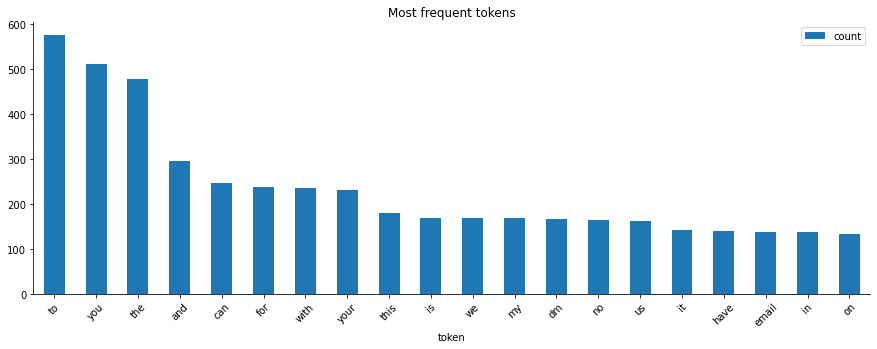

In [36]:
word_counts = X_train_transformed.toarray().sum(axis=0)

def plot_most_frequent(words, word_counts, top=20):
    words_df = pd.DataFrame({"token": words, 
                             "count": word_counts})
    
    fig, ax = plt.subplots(figsize=(0.75*top, 5))
    words_df.sort_values(by="count", ascending=False).head(top)\
        .set_index("token")\
        .plot(kind="bar", rot=45, ax=ax)
    sns.despine()
    plt.title("Most frequent tokens")
    plt.show()
    
plot_most_frequent(words, word_counts)

In [37]:
bagofwords = CountVectorizer(stop_words="english")
bagofwords.fit(X_train)

X_train_transformed = bagofwords.transform(X_train) 
X_test_transformed = bagofwords.transform(X_test) 

X_train_transformed.shape

(722, 1835)

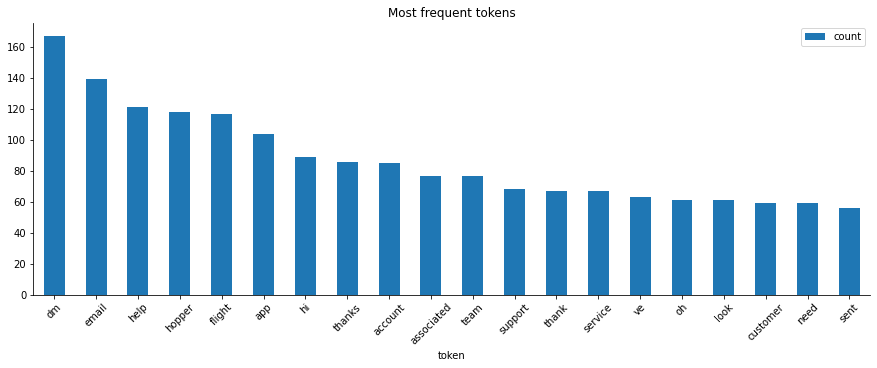

In [38]:
words = bagofwords.get_feature_names()
word_counts = X_train_transformed.toarray().sum(axis=0)

plot_most_frequent(words, word_counts)

In [39]:
# Fitting a model
logreg = LogisticRegression(C = 0.1)
logreg.fit(X_train_transformed, y_train)

# Training and test score
print(f"Train score: {logreg.score(X_train_transformed, y_train)}")
print(f"Test score: {logreg.score(X_test_transformed, y_test)}")

Train score: 0.832409972299169
Test score: 0.8095238095238095


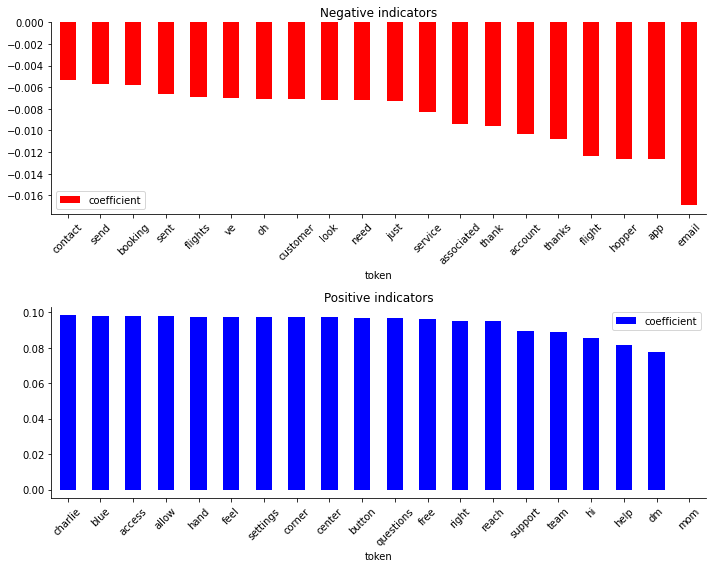

In [40]:
def plot_coefs(logreg, words):
    coef_df = pd.DataFrame({"coefficient": logreg.coef_[0], "token": words})
    coef_df = coef_df.sort_values("coefficient", ascending=False)

    fig, axs = plt.subplots(2, 1, figsize=(10, 8))

    # smallest coefficient -> tokens indicating negative sentiment 
    coef_df.tail(20).set_index("token").plot(kind="bar", rot=45, ax=axs[0], color="red")
    axs[0].set_title("Negative indicators")
 
    
    # largest coefficient -> tokens indicating positive sentiment 
    coef_df.head(20).set_index("token").plot(kind="bar", rot=45, ax=axs[1], color="blue")
    axs[1].set_title("Positive indicators")
    
    sns.despine()
    plt.tight_layout()
    plt.show()
    
plot_coefs(logreg, words)

In [41]:
bagofwords = CountVectorizer(stop_words="english", min_df=5)
bagofwords.fit(X_train)

X_train_transformed = bagofwords.transform(X_train)

X_train_transformed.shape

(722, 263)

In [42]:
bagofwords = CountVectorizer(stop_words="english",
                             min_df=5,
                             max_features=1000)
bagofwords.fit(X_train)

X_train_transformed = bagofwords.transform(X_train)

X_train_transformed.shape

(722, 263)

In [43]:
import nltk

# Let's test it out
stemmer = nltk.stem.PorterStemmer()

[stemmer.stem(i) for i in ['run', 'runs', 'running', 'ran', 'jogged', 'jogging', 'jogs']]

['run', 'run', 'run', 'ran', 'jog', 'jog', 'jog']

In [44]:
bagofwords = CountVectorizer(min_df=5, 
                             tokenizer = lambda x: [stemmer.stem(i) for i in x.split(' ')], 
                             stop_words='english')
bagofwords.fit(X_train)

X_train_transformed = bagofwords.transform(X_train)
X_test_transformed = bagofwords.transform(X_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:489: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor

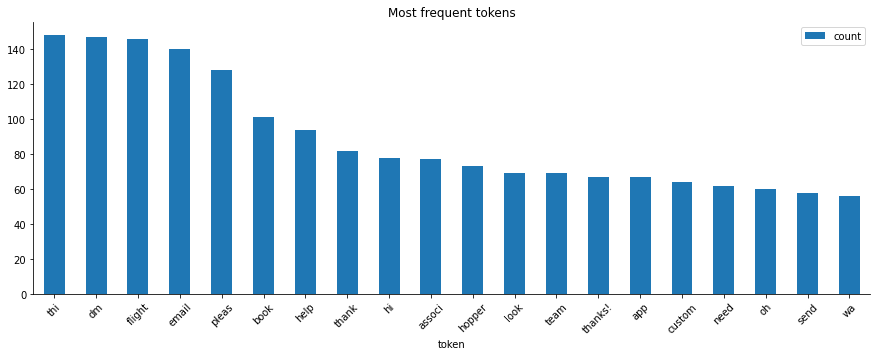

In [45]:
words = bagofwords.get_feature_names()
word_counts = X_train_transformed.toarray().sum(axis=0)

plot_most_frequent(words, word_counts)

In [46]:
# the python string package has a helpful punctuation list
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [47]:
# a dummy sentence used for checking our process
sentence = "The quick brown fox, jumped over the lazy dog!!"

# after splitting the text based on spaces
split_sentence = sentence.split(' ')

# we stem and remove punctuation
tokenized_sentence = []
for word in split_sentence:
    for punctuation_mark in string.punctuation:
        word = word.replace(punctuation_mark, '')
    stemmed_word = stemmer.stem(word)
    tokenized_sentence.append(stemmed_word)
    
print(tokenized_sentence)

['the', 'quick', 'brown', 'fox', 'jump', 'over', 'the', 'lazi', 'dog']


In [48]:
# import the nltk stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords 

ENGLISH_STOP_WORDS = stopwords.words('english')

def my_tokenizer(sentence):
    # remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark,'').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
    # remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/d_anderson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
# checking tokenizer on simple sentence from above
my_tokenizer(sentence)

['quick', 'brown', 'fox', 'jump', 'lazi', 'dog']

In [50]:
bagofwords = CountVectorizer(min_df=5, 
                             tokenizer=my_tokenizer)
bagofwords.fit(X_train)

X_train_transformed = bagofwords.transform(X_train)
X_test_transformed = bagofwords.transform(X_test)

X_train_transformed.shape

(722, 301)

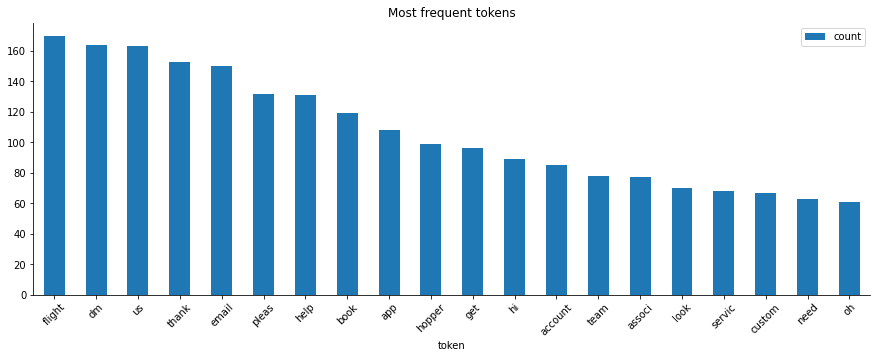

In [51]:
words = bagofwords.get_feature_names()
word_counts = X_train_transformed.toarray().sum(axis=0)

plot_most_frequent(words, word_counts)

In [52]:
# Fitting a model
logreg = LogisticRegression(C = 0.1)
logreg.fit(X_train_transformed, y_train)

# Training and test score
print(f"Train score: {logreg.score(X_train_transformed, y_train)}")
print(f"Test score: {logreg.score(X_test_transformed, y_test)}")

Train score: 0.8185595567867036
Test score: 0.8095238095238095


In [53]:
bagofwords = CountVectorizer(min_df=5,
                             tokenizer=my_tokenizer,
                             ngram_range=(1, 3))
bagofwords.fit(X_train)

X_train_transformed = bagofwords.transform(X_train)
X_test_transformed = bagofwords.transform(X_test)

X_train_transformed.shape

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:489: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



(722, 509)

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
# using our custom tokenizer in TfidfVectorizer
tfidf = TfidfVectorizer(min_df=5,
                        tokenizer=my_tokenizer)
tfidf.fit(X_train)

X_train_transformed = tfidf.transform(X_train)
X_test_transformed = tfidf.transform(X_test)

X_train_transformed.shape

(722, 301)

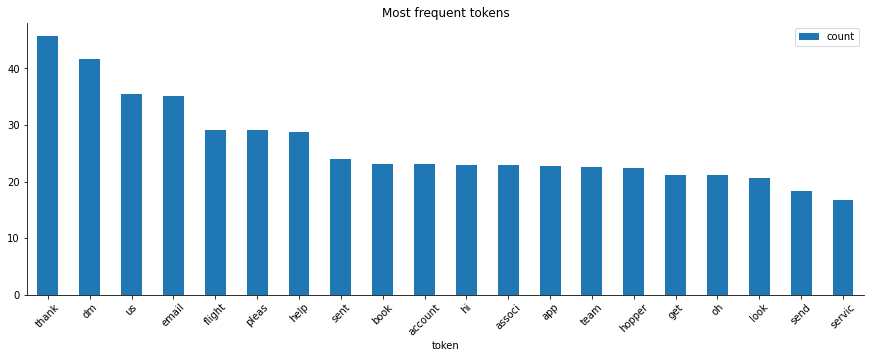

In [56]:
words = tfidf.get_feature_names()
word_weights = X_train_transformed.toarray().sum(axis=0)

plot_most_frequent(words, word_weights)